In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import scipy

In [4]:
import matplotlib.pyplot as plt

In [5]:
import statsmodels.api as sm

In [19]:
import statsmodels.formula.api as smf

In [23]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

In [24]:
print(df2)

      economy    time  Renewable energy consumption  \
0         ABW  YR1970                           NaN   
1         ABW  YR1971                           NaN   
2         ABW  YR1972                           NaN   
3         ABW  YR1973                           NaN   
4         ABW  YR1974                           NaN   
...       ...     ...                           ...   
12933     ZWE  YR2015                     81.427200   
12934     ZWE  YR2016                     82.792603   
12935     ZWE  YR2017                     83.492996   
12936     ZWE  YR2018                     81.363602   
12937     ZWE  YR2019                           NaN   

       Fossil fuel energy consumption  CO2 intensity  \
0                                 NaN            NaN   
1                                 NaN            NaN   
2                                 NaN            NaN   
3                                 NaN            NaN   
4                                 NaN            NaN   
...

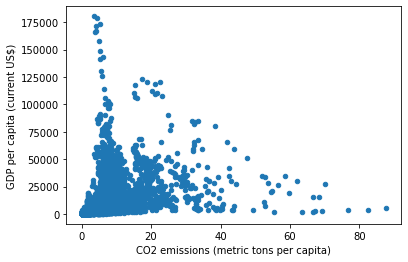

In [29]:
scatter = df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [30]:
scatter.figure.savefig('intitial scatter.pdf', dpi=300)

In [31]:
updated_df = df.dropna(axis=1) # not the best strategy, will figure out how to make a balanced data set?
X = updated_df['CO2 emissions (metric tons per capita)']
Y = updated_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

KeyError: 'CO2 emissions (metric tons per capita)'

In [14]:
GDP_CO2 = df.filter(['GDP per capita (current US$)', 'CO2 emissions (metric tons per capita)'], axis=1)

In [15]:
print(GDP_CO2)

       GDP per capita (current US$)  CO2 emissions (metric tons per capita)
0                               NaN                                     NaN
1                               NaN                                     NaN
2                               NaN                                     NaN
3                               NaN                                     NaN
4                               NaN                                     NaN
...                             ...                                     ...
12933                   1445.069702                                0.897598
12934                   1464.588957                                0.783303
12935                   1235.189032                                0.718570
12936                   1254.642265                                0.849793
12937                   1316.740657                                     NaN

[12938 rows x 2 columns]


In [23]:
GDP_CO2.to_csv('GDP_CO2.csv')

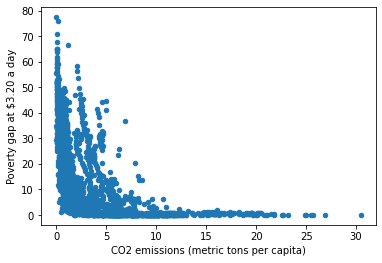

In [25]:
scatter = df.plot.scatter('CO2 emissions (metric tons per capita)', 'Poverty gap at $3.20 a day')
# countries with lower poverty gap have more emissions?

In [26]:
scatter.figure.savefig('intitial scatter2.pdf', dpi=300)

In [39]:

df_2018 = df[df['time'] == 'YR2018']


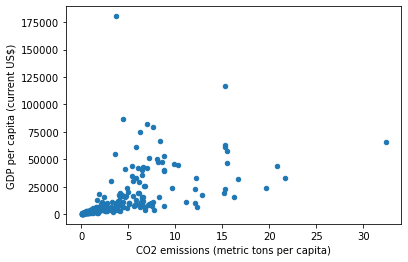

In [40]:
scatter = df_2018.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [41]:
scatter.figure.savefig('intitial scatter3pdf', dpi=300)

In [44]:
print(df.describe(include=['object']))

       economy    time
count    12938   12938
unique     264      50
top        LCA  YR2006
freq        50     264
